In [55]:
# !pip install natsort
# !pip install tensorflow

import pandas as pd 
import numpy as np
import os
import natsort
import shutil
from re import search
from PIL import Image
import matplotlib.pyplot as plt
import tensorflow as tf
from tqdm import tqdm

### Importing the csv file containing img id and label

In [56]:
df = pd.read_csv('/home/ds/Desktop/PlantDiseas/plant-pathology-2021-fgvc8/train.csv')

In [57]:
df.labels.value_counts()

scab                               4826
healthy                            4624
frog_eye_leaf_spot                 3181
rust                               1860
complex                            1602
powdery_mildew                     1184
scab frog_eye_leaf_spot             686
scab frog_eye_leaf_spot complex     200
frog_eye_leaf_spot complex          165
rust frog_eye_leaf_spot             120
rust complex                         97
powdery_mildew complex               87
Name: labels, dtype: int64

In [59]:
df.shape

(18632, 2)

In [9]:
df.head()

,image,labels
0,800113bb65efe69e.jpg,healthy
1,8002cb321f8bfcdf.jpg,scab frog_eye_leaf_spot complex
2,80070f7fb5e2ccaa.jpg,scab
3,80077517781fb94f.jpg,scab
4,800cbf0ff87721f8.jpg,complex


# Data Prep

### Categorizing the pictures into different folders based on labels in the csv file

In [10]:
imgdir = '/home/ds/Desktop/PlantDiseas/plant-pathology-2021-fgvc8/train_images/'

In [11]:
os.listdir(imgdir)

['d56fd3558906c938.jpg',
 'a86d9d1f99b04a96.jpg',
 'fc97d283889597a8.jpg',
 'df6c81c8070ddf52.jpg',
 'f4b0c395cf688ca5.jpg',
 'f40a426e473f8eaa.jpg',
 'f0c5c7ce1386f131.jpg',
 'd93778212d07e58b.jpg',
 '8d9c9cd2a3eb0e4a.jpg',
 'f981800387e7d3d7.jpg',
 'abc397970c5a3c68.jpg',
 '8bd39bca890ced49.jpg',
 'c13f9bc1e8808f37.jpg',
 'b5168a6045b2fd9d.jpg',
 'e191927e3c0676d3.jpg',
 'c9552feaf086c05e.jpg',
 '9472e4d782deb192.jpg',
 'a8cea2c0ca8fcbcb.jpg',
 'cc73e005cc36f31e.jpg',
 'c0ad2dad55930adb.jpg',
 '8bc9c28acf7f2530.jpg',
 '8cf7b8c388ad459a.jpg',
 'b7bcca8ce84f5046.jpg',
 '8e97869f9e143863.jpg',
 'f90fd28104a5bcf6.jpg',
 'c94a3af6bea68b80.jpg',
 'cf9cc993c3d32581.jpg',
 'fad641aa95eab406.jpg',
 'b3f08fe0ce07cc92.jpg',
 '99c2989f3189772d.jpg',
 'f14b815ece3d203d.jpg',
 '809f7a96a508f43f.jpg',
 'c80e976c74706773.jpg',
 'fde49181de95891a.jpg',
 'ffb5c17927283032.jpg',
 'dcdf3c3166d22524.jpg',
 'eca8c21f441dafb4.jpg',
 'bc3f8bc0c2c92f86.jpg',
 'e3f394aa8b297720.jpg',
 'e3921d58a3a5acad.jpg',


In [12]:
imgname = []
imglabel = []
for i, row in df.iterrows():
    imgname.append(row[0])
    imglabel.append(row[1])


In [8]:
# Creating folders for different labels
shutil.os.mkdir('/home/ds/Desktop/PlantDiseas/plant-pathology-2021-fgvc8/train')
shutil.os.mkdir('/home/ds/Desktop/PlantDiseas/plant-pathology-2021-fgvc8/train/healthy')
shutil.os.mkdir('/home/ds/Desktop/PlantDiseas/plant-pathology-2021-fgvc8/train/scab')
shutil.os.mkdir('/home/ds/Desktop/PlantDiseas/plant-pathology-2021-fgvc8/train/frog_eye_leaf_spot')
shutil.os.mkdir('/home/ds/Desktop/PlantDiseas/plant-pathology-2021-fgvc8/train/rust')
shutil.os.mkdir('/home/ds/Desktop/PlantDiseas/plant-pathology-2021-fgvc8/train/complex')
shutil.os.mkdir('/home/ds/Desktop/PlantDiseas/plant-pathology-2021-fgvc8/train/powderly_mildew')
shutil.os.mkdir('/home/ds/Desktop/PlantDiseas/plant-pathology-2021-fgvc8/train/scab_frog_eye_leaf_spot')
shutil.os.mkdir('/home/ds/Desktop/PlantDiseas/plant-pathology-2021-fgvc8/train/scab_frog_eye_leaf_spot_complex')
shutil.os.mkdir('/home/ds/Desktop/PlantDiseas/plant-pathology-2021-fgvc8/train/frog_eye_leaf_spot_complex')
shutil.os.mkdir('/home/ds/Desktop/PlantDiseas/plant-pathology-2021-fgvc8/train/rust_frog_eye_leaf_spot')
shutil.os.mkdir('/home/ds/Desktop/PlantDiseas/plant-pathology-2021-fgvc8/train/rust_complex')
shutil.os.mkdir('/home/ds/Desktop/PlantDiseas/plant-pathology-2021-fgvc8/train/powder_mildew_complex')

In [9]:
# Copying the images into the right folder
srce = '/home/ds/Desktop/PlantDiseas/plant-pathology-2021-fgvc8/train_images/'
dest = '/home/ds/Desktop/PlantDiseas/plant-pathology-2021-fgvc8/train/'
ind = 0
for i in imgname:
    src = srce+i
    if imglabel[ind] == 'healthy':
        shutil.copy(src, '/home/ds/Desktop/PlantDiseas/plant-pathology-2021-fgvc8/train/healthy')
    
    elif imglabel[ind] == 'frog_eye_leaf_spot':
        shutil.copy(src, '/home/ds/Desktop/PlantDiseas/plant-pathology-2021-fgvc8/train/frog_eye_leaf_spot')
    
    elif imglabel[ind] == 'scab':
        shutil.copy(src, '/home/ds/Desktop/PlantDiseas/plant-pathology-2021-fgvc8/train/scab')   
    
    elif imglabel[ind] == 'rust':
        shutil.copy(src, '/home/ds/Desktop/PlantDiseas/plant-pathology-2021-fgvc8/train/rust')
    
    elif imglabel[ind] == 'complex':
        shutil.copy(src, '/home/ds/Desktop/PlantDiseas/plant-pathology-2021-fgvc8/train/complex')
    
    elif imglabel[ind] =='powdery_mildew':
        shutil.copy(src, '/home/ds/Desktop/PlantDiseas/plant-pathology-2021-fgvc8/train/powderly_mildew')
    
    elif imglabel[ind] =='scab frog_eye_leaf_spot':
        shutil.copy(src, '/home/ds/Desktop/PlantDiseas/plant-pathology-2021-fgvc8/train/scab_frog_eye_leaf_spot')
    
    elif imglabel[ind] =='scab frog_eye_leaf_spot complex':
        shutil.copy(src, '/home/ds/Desktop/PlantDiseas/plant-pathology-2021-fgvc8/train/scab_frog_eye_leaf_spot_complex')
    
    elif imglabel[ind] =='frog_eye_leaf_spot complex':
        shutil.copy(src, '/home/ds/Desktop/PlantDiseas/plant-pathology-2021-fgvc8/train/frog_eye_leaf_spot_complex')
        
    elif imglabel[ind] == 'rust frog_eye_leaf_spot':
        shutil.copy(src, '/home/ds/Desktop/PlantDiseas/plant-pathology-2021-fgvc8/train/rust_frog_eye_leaf_spot')
                    
    elif imglabel[ind] == 'rust complex':
        shutil.copy(src, '/home/ds/Desktop/PlantDiseas/plant-pathology-2021-fgvc8/train/rust_complex')
    
    elif imglabel[ind] == 'powdery_mildew complex':
        shutil.copy(src, '/home/ds/Desktop/PlantDiseas/plant-pathology-2021-fgvc8/train/powder_mildew_complex')
    
    ind+=1

In [13]:
df.labels.value_counts()

scab                               4826
healthy                            4624
frog_eye_leaf_spot                 3181
rust                               1860
complex                            1602
powdery_mildew                     1184
scab frog_eye_leaf_spot             686
scab frog_eye_leaf_spot complex     200
frog_eye_leaf_spot complex          165
rust frog_eye_leaf_spot             120
rust complex                         97
powdery_mildew complex               87
Name: labels, dtype: int64

# Data preprocessing

In [14]:
!pip install opencv-python
import cv2

In [15]:
trainDir = '/home/ds/Desktop/PlantDiseas/plant-pathology-2021-fgvc8/train/'
folders = os.listdir(trainDir)

for i in folders:
    path = os.path.join(trainDir,i)
    
    for im in os.listdir(path):
        img_arr = cv2.imread(os.path.join(path, im), cv2.COLOR_BGR2RGB)




KeyboardInterrupt: 

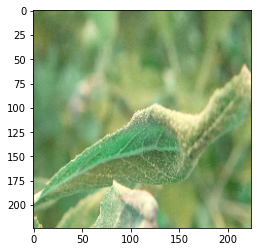

In [16]:
imSize = 224
new_im = cv2.resize(img_arr, (imSize,imSize))
plt.imshow(new_im)

# Model Prep

In [28]:
folders

['powderly_mildew',
 'powder_mildew_complex',
 'healthy',
 'scab_frog_eye_leaf_spot_complex',
 'complex',
 'rust_frog_eye_leaf_spot',
 'frog_eye_leaf_spot_complex',
 'frog_eye_leaf_spot',
 'scab_frog_eye_leaf_spot',
 'rust',
 'scab',
 'rust_complex']

In [29]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D

In [36]:
dataGen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, 
                                  horizontal_flip=True, vertical_flip=True,
                                 validation_split=0.2)

trianDataGen = dataGen.flow_from_directory('/home/ds/Desktop/PlantDiseas/plant-pathology-2021-fgvc8/train', 
                                           target_size=(imSize,imSize),
                                          batch_size=16,
                                          class_mode='categorical',
                                          subset='training')

validDataGen = dataGen.flow_from_directory('/home/ds/Desktop/PlantDiseas/plant-pathology-2021-fgvc8/train', 
                                           target_size=(imSize,imSize),
                                          batch_size=16,
                                          class_mode='categorical',
                                          subset='validation')


Found 14909 images belonging to 12 classes.
Found 3723 images belonging to 12 classes.


In [43]:
model = Sequential()
model.add(Conv2D(64,(3,3), activation = 'relu', padding='same', input_shape=(imSize,imSize, 3)))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(128,(3,3), activation = 'relu', padding='same'))
model.add(MaxPooling2D(2,2))

            
model.add(Conv2D(256,(3,3), activation = 'relu', padding='same'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(512,(3,3), activation = 'relu', padding='same'))
model.add(MaxPooling2D(2,2))

      
model.add(Flatten())
model.add(Dense(12, activation='softmax')) # Density are total classes

opt = tf.keras.optimizers.Adam(learning_rate=0.001, name='Adam')
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 224, 224, 64)      1792      
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 112, 112, 64)     0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 112, 112, 128)     73856     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 56, 56, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 56, 56, 256)       295168    
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 28, 28, 256)     

In [37]:
checkpoint = ModelCheckpoint('/home/ds/Desktop/PlantDiseas/plant-pathology-2021-fgvc8/models/apple.h5', 
                            monitor='val_loss',
                            mode='min',
                            save_best_only=True,
                            verbose = 1)

earyStop = EarlyStopping(monitor='val_loss', min_delta=0, patience=10,verbose=1, restore_best_weights=True)

callBacks = [checkpoint, earyStop]

In [44]:
modelHistory = model.fit_generator(trianDataGen, validation_data=validDataGen,
                                  epochs=30,
                                  steps_per_epoch = trianDataGen.samples//16,
                                  validation_steps=validDataGen.samples//16,
                                  callbacks = callBacks)

<ipython-input-44-9a57cc0d81a0>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  modelHistory = model.fit_generator(trianDataGen, validation_data=validDataGen,


Epoch 1/30
931/931 [==============================] - ETA: 0s - loss: 1.7504 - accuracy: 0.3412
Epoch 00001: val_loss improved from inf to 1.64475, saving model to /home/ds/Desktop/PlantDiseas/plant-pathology-2021-fgvc8/models/apple.h5
931/931 [==============================] - 4696s 5s/step - loss: 1.7504 - accuracy: 0.3412 - val_loss: 1.6448 - val_accuracy: 0.3898
Epoch 2/30
931/931 [==============================] - ETA: 0s - loss: 1.4593 - accuracy: 0.4741
Epoch 00002: val_loss improved from 1.64475 to 1.27847, saving model to /home/ds/Desktop/PlantDiseas/plant-pathology-2021-fgvc8/models/apple.h5
931/931 [==============================] - 4683s 5s/step - loss: 1.4593 - accuracy: 0.4741 - val_loss: 1.2785 - val_accuracy: 0.5480
Epoch 3/30
931/931 [==============================] - ETA: 0s - loss: 1.1257 - accuracy: 0.6046
Epoch 00003: val_loss improved from 1.27847 to 1.11718, saving model to /home/ds/Desktop/PlantDiseas/plant-pathology-2021-fgvc8/models/apple.h5
931/931 [=========

Epoch 27/30
931/931 [==============================] - ETA: 0s - loss: 0.4304 - accuracy: 0.8595
Epoch 00027: val_loss did not improve from 0.59802
931/931 [==============================] - 4698s 5s/step - loss: 0.4304 - accuracy: 0.8595 - val_loss: 0.6170 - val_accuracy: 0.8262
Epoch 28/30
931/931 [==============================] - ETA: 0s - loss: 0.4176 - accuracy: 0.8625
Epoch 00028: val_loss did not improve from 0.59802
931/931 [==============================] - 4658s 5s/step - loss: 0.4176 - accuracy: 0.8625 - val_loss: 0.6686 - val_accuracy: 0.8106
Epoch 29/30
931/931 [==============================] - ETA: 0s - loss: 0.4179 - accuracy: 0.8616
Epoch 00029: val_loss did not improve from 0.59802
931/931 [==============================] - 4712s 5s/step - loss: 0.4179 - accuracy: 0.8616 - val_loss: 0.6581 - val_accuracy: 0.8098
Epoch 30/30
931/931 [==============================] - ETA: 0s - loss: 0.4096 - accuracy: 0.8619
Epoch 00030: val_loss did not improve from 0.59802
931/931 [

In [46]:
trainingAccuracy = model_history.history['accuracy']
accuracyValidation = model_history.history['val_accuracy']
epochs = range(0,30)
plt.plot(epochs, trainingAccuracy, 'black', label = 'Training Accuracy')
plt.plot(epochs, accuracyValidation, 'green', label = 'Accuracy Validation')
plt.title('Training & Validation Accuracy')
plt.show()

NameError: name 'model_history' is not defined

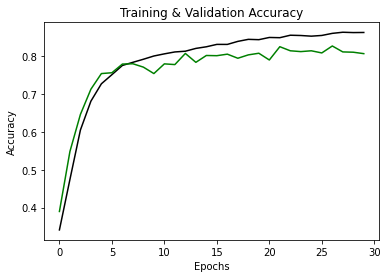

In [60]:
trainingAccuracy = modelHistory.history['accuracy']
accuracyValidation = modelHistory.history['val_accuracy']
epochs = range(0,30)
plt.plot(epochs, trainingAccuracy, 'black', label = 'Training Accuracy')
plt.plot(epochs, accuracyValidation, 'green', label = 'Accuracy Validation')
plt.title('Training & Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.show()

In [51]:
# Testing the model
from tensorflow.keras.preprocessing import image
testImage = '/home/ds/Desktop/PlantDiseas/plant-pathology-2021-fgvc8/train/healthy/8a0be55d81f4bf0c.jpg'
testImage = image.load_img(testImage, target_size = (224,224))
testImage = image.img_to_array(testImage)
testImage = testImage/255
testImage = np.expand_dims(testImage, axis=0)
result = model.predict(testImage)
print(result)

[[5.5765704e-05 4.4575075e-04 2.3318355e-06 9.9643207e-01 7.2209791e-06
  2.0990935e-03 1.1237604e-05 4.9326559e-06 2.1712276e-07 9.3845313e-04
  2.8346396e-06 1.4562343e-07]]


frog_eye_leaf_spot_complex


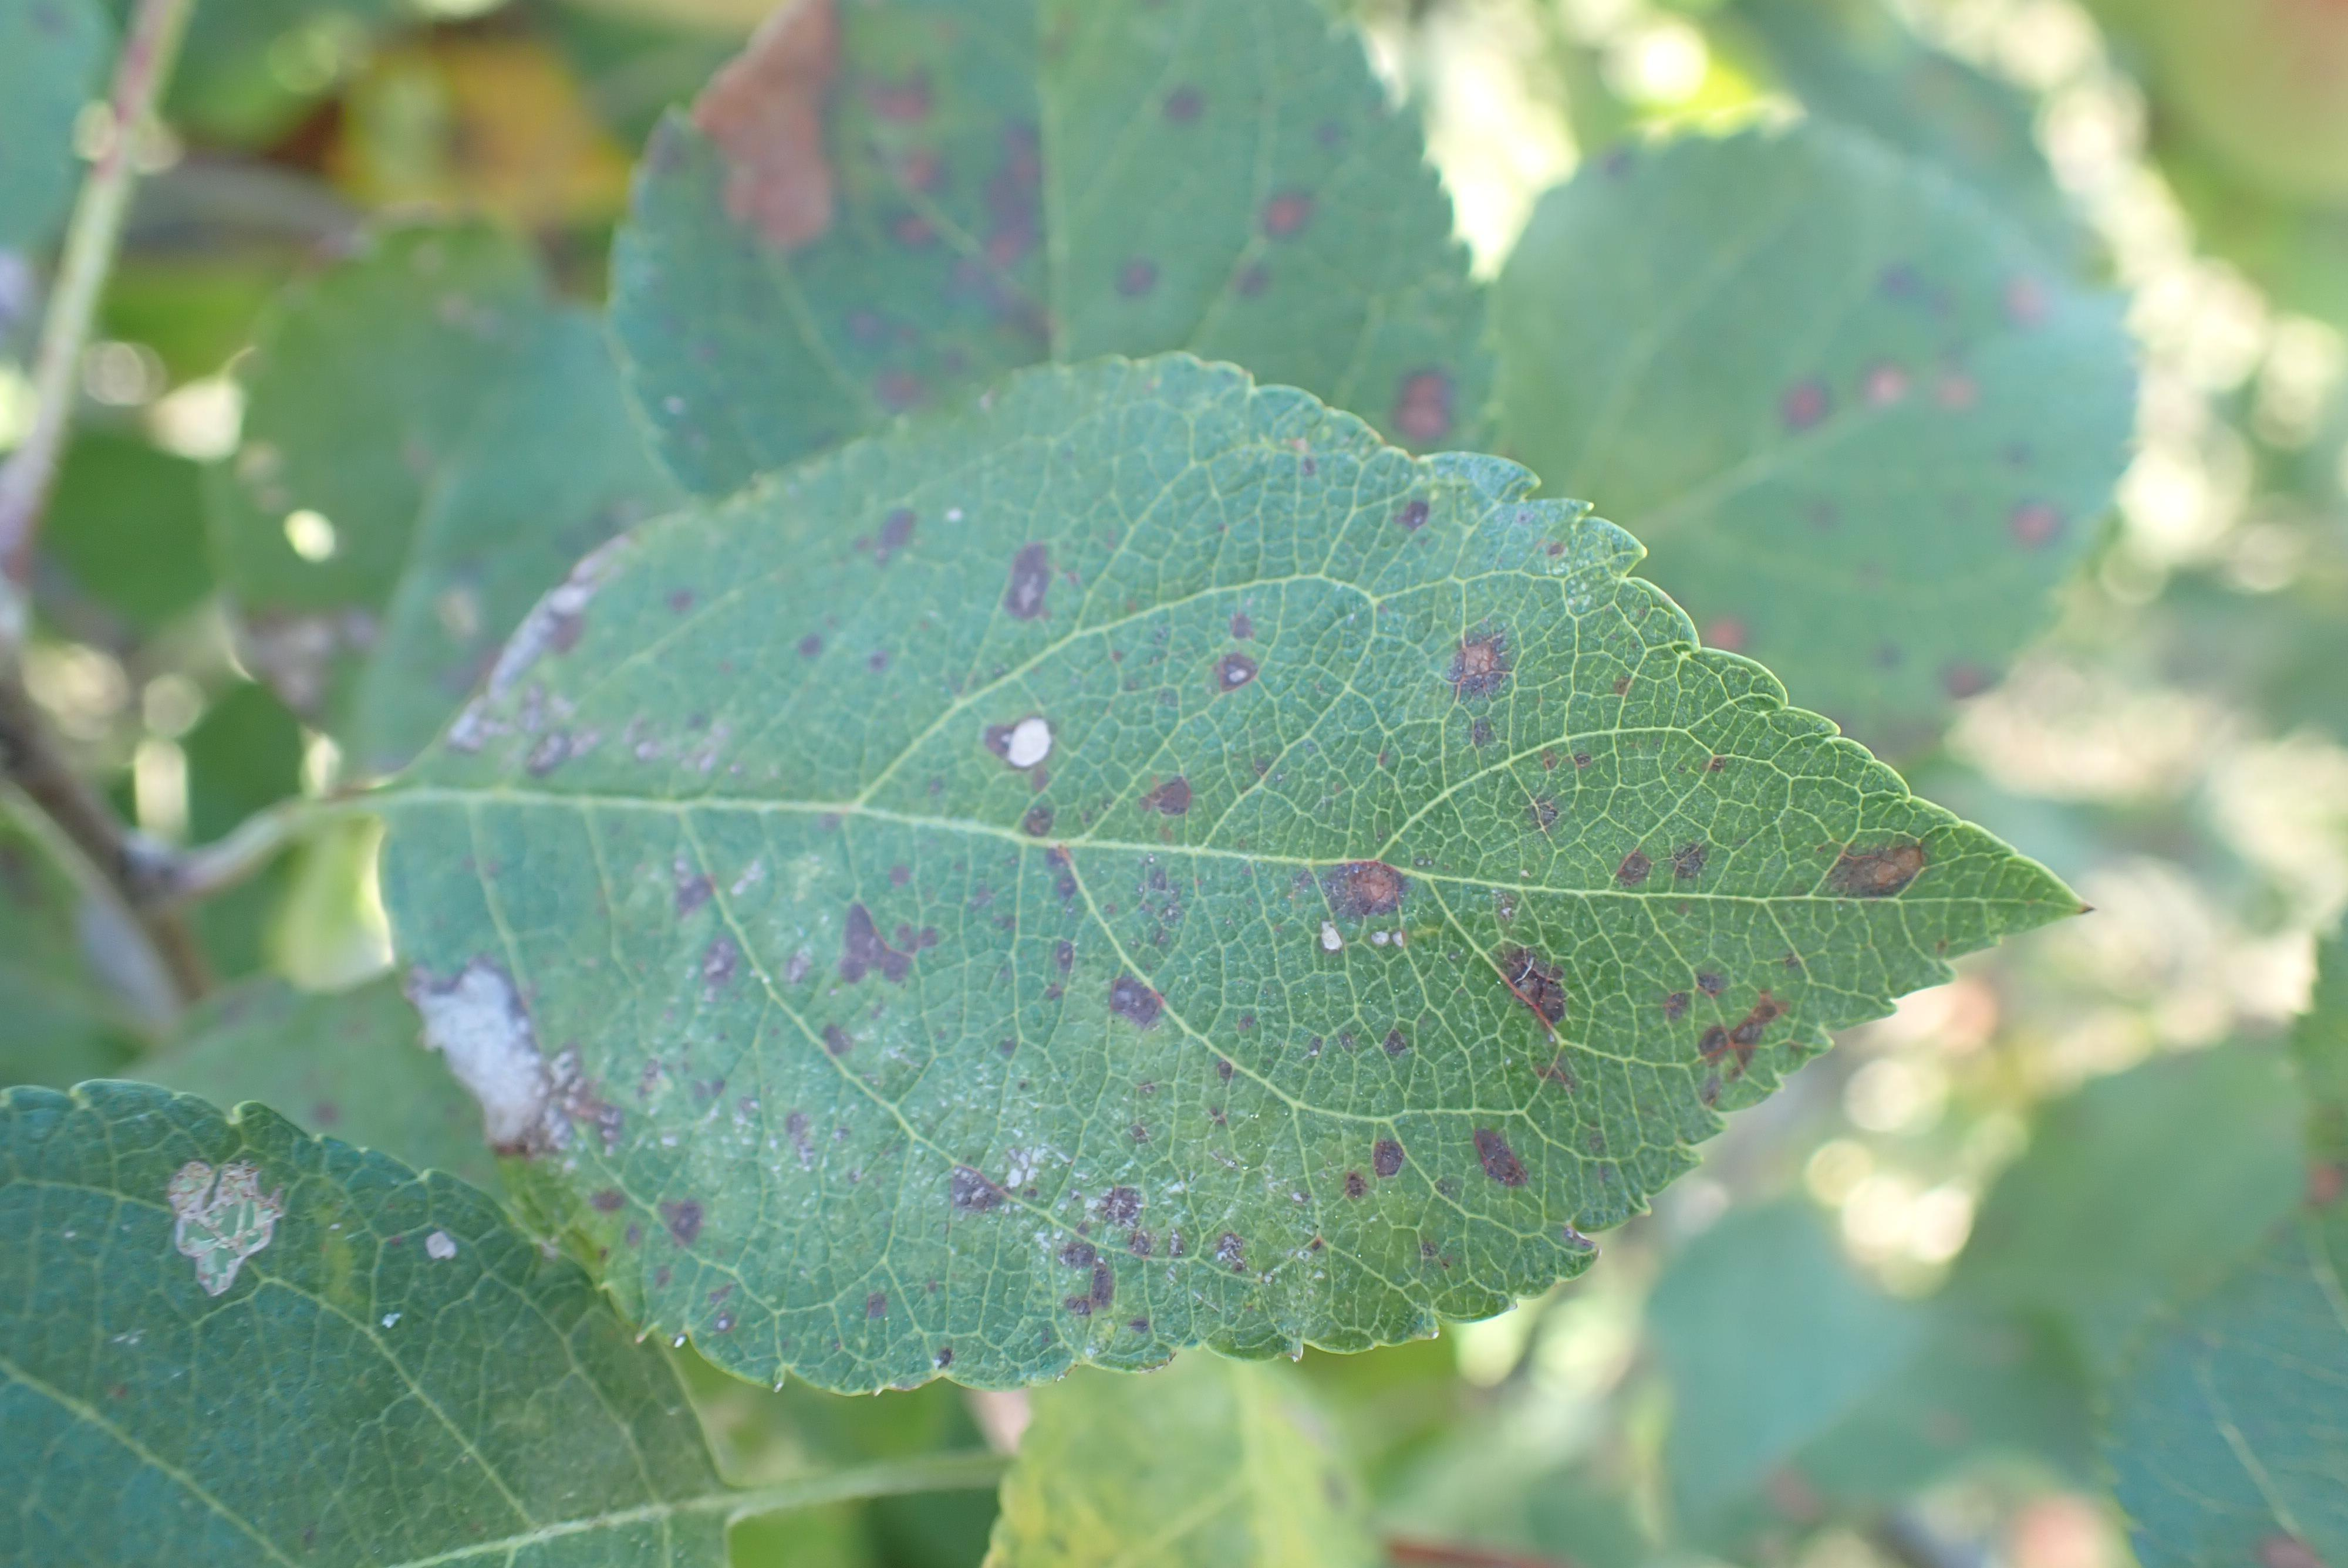

In [54]:
from keras.preprocessing import image
from IPython.display import Image

def load_image(img_path, show=False):
    
    img = image.load_img(img_path, target_size=(224, 224))
    img_tensor = image.img_to_array(img)                    # (height, width, channels)
    img_tensor = np.expand_dims(img_tensor, axis=0)         # (1, height, width, channels), add a dimension because the model expects this shape: (batch_size, height, width, channels)
    img_tensor /= 255.                                      # imshow expects values in the range [0, 1]

    if show:
        plt.imshow(img_tensor[0])                           
        plt.axis('off')
        plt.show()

    return img_tensor

path = "/home/ds/Desktop/PlantDiseas/plant-pathology-2021-fgvc8/train/frog_eye_leaf_spot_complex/8bbb17a59b16851a.jpg"
image = load_image(path)
pred = model.predict(image)
class_pred = np.argmax(pred, axis = 1)

# Classes are ['healthy', 'multiple_diseases', 'rust', 'scab']
plant_classes = ['complex', 'frog_eye_leaf_spot', 'frog_eye_leaf_spot_complex', 
                 'healthy','powederly_mildew', 
                 'powederly_mildew_complex', 'rust', 
                 'rust_complex', 'rust_frog_eye_leaf_spot', 
                 'scab', 'scab_frog_eye_leaf_spot', 'scab_frog_eye_leaf_spot_complex']

print(plant_classes[int(class_pred)])

#Display chosen image
Image(filename=path)